<a href="https://colab.research.google.com/github/N-Jayanth/N-Jayanth/blob/main/Salary_Mini_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# from controlcharts import control_chart

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/ds_salaries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [ ]:
df.shape



(607, 12)

In [ ]:
df.describe()


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


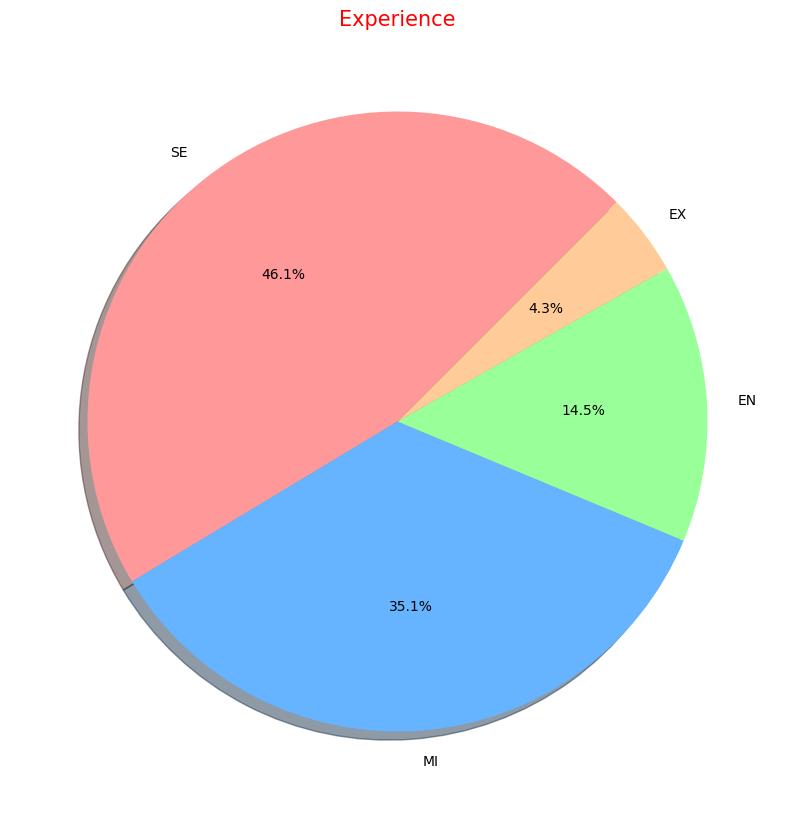

In [ ]:
abels = df["experience_level"].value_counts().index
sizes = df["experience_level"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (10,16))
plt.pie(sizes, labels=abels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, # Changed labels=labels to labels=abels
startangle=45)
plt.title('Experience',color = 'red',fontsize = 15)
plt.show()

<ipython-input-14-e2a19dd92631>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="work_year",palette="icefire")


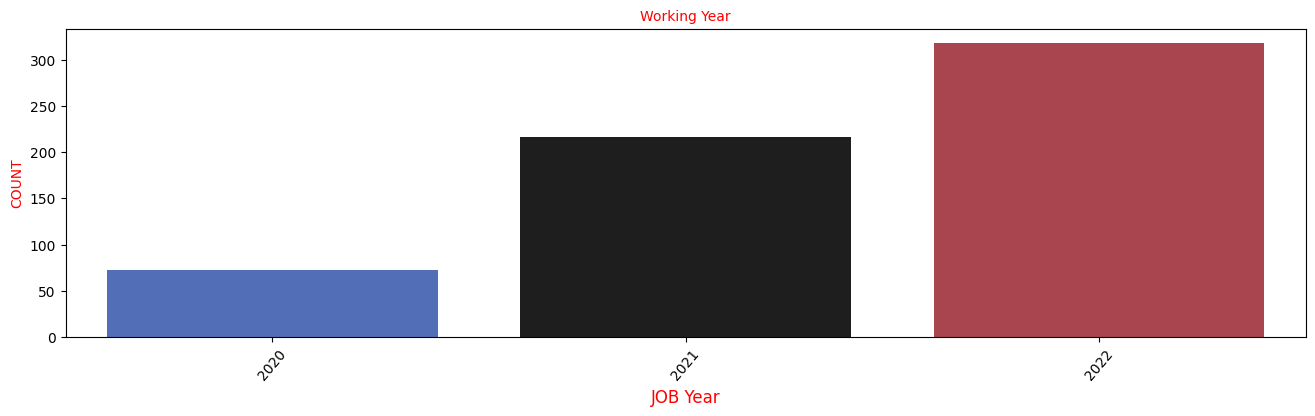

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(data=df,x="work_year",palette="icefire")
plt.xticks(fontsize=10,rotation=50)
plt.xlabel("JOB Year",fontsize=12,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("Working Year",fontsize=10,color="RED")
plt.show()

<ipython-input-26-8dda060b9218>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




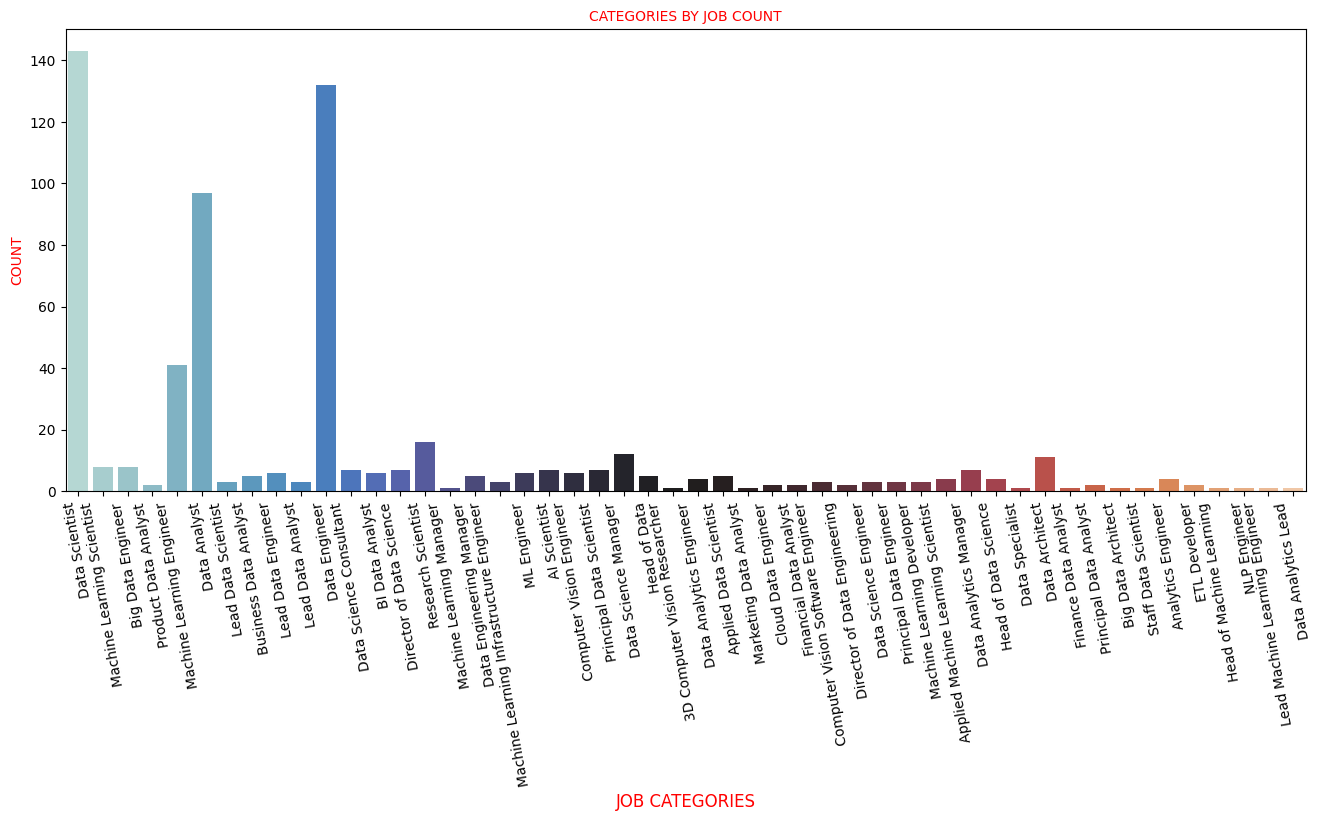

In [ ]:
plt.figure(figsize=(16,6))
# Check if 'job_category' is the correct column name
# If not, replace it with the correct name
sns.countplot(data=df, x="job_title", palette="icefire")
plt.xticks(fontsize=10, rotation=100)
plt.xlabel("JOB CATEGORIES", fontsize=12, color="RED")
plt.ylabel("COUNT", fontsize=10, color="RED")
plt.title("CATEGORIES BY JOB COUNT", fontsize=10, color="RED")
plt.show()

In [ ]:
fig=px.bar(df.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'salary in Thousands'},template='ggplot2',text='salary_in_usd',title='<b> Top 10 Highest Paid Roles in Data Science')
fig.show()

In [ ]:
z=df.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False)
z['salary_in_usd']=round(z['salary_in_usd'],2)
fig=px.bar(z.head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'avg salary in Thousands'},text='salary_in_usd',template='seaborn',title='<b> Top 10 Roles in Data Science based on Average Pay')
fig.update_traces(textfont_size=8)
fig.show()

fig.update_traces(textfont_size=8)
fig.show()


In [ ]:
px.funnel(df.groupby('company_location',as_index=False)['experience_level'].count().sort_values(by='experience_level',ascending=False).head(15),y='company_location',x='experience_level',color_discrete_sequence=['yellow'],labels={'experience_level':'count'},template='seaborn',title='<b> Top 15 Countries having maximum Data Science Jobs')

In [ ]:
fig=px.pie(df.groupby('experience_level',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='experience_level',values='salary_in_usd',color='experience_level',hole=0.7,labels={'experience_level':'Experience level','salary_in_usd':'count'},template='ggplot2',title='<b>Total Jobs Based on Experience Level')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))